In [ ]:
!kaggle datasets download -d osmi/mental-health-in-tech-survey

Dataset URL: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey
License(s): CC-BY-SA-4.0
  0% 0.00/48.8k [00:00<?, ?B/s]
100% 48.8k/48.8k [00:00<00:00, 58.5MB/s]


In [ ]:
from google.colab import files
import zipfile
import os

filename = r'//content/mental-health-in-tech-survey.zip'

extract_dir = r'/content/mental-health-survey'
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f'Files extracted to {extract_dir}')

Files extracted to /content/mental-health-survey


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/mental-health-survey/survey.csv')

In [ ]:
df.info

<bound method DataFrame.info of                 Timestamp  Age  Gender         Country state self_employed  \
0     2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1     2014-08-27 11:29:37   44       M   United States    IN           NaN   
2     2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3     2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4     2014-08-27 11:30:22   31    Male   United States    TX           NaN   
...                   ...  ...     ...             ...   ...           ...   
1254  2015-09-12 11:17:21   26    male  United Kingdom   NaN            No   
1255  2015-09-26 01:07:35   32    Male   United States    IL            No   
1256  2015-11-07 12:36:58   34    male   United States    CA            No   
1257  2015-11-30 21:25:06   46       f   United States    NC            No   
1258  2016-02-01 23:04:31   25    Male   United States    IL            No   

     family_history treatment work_interfere    no_employees  ...  \
0                No       Yes          Often            6-25  ...   
1                No        No         Rarely  More than 1000  ...   
2                No        No         Rarely            6-25  ...   
3               Yes       Yes          Often          26-100  ...   
4                No        No          Never         100-500  ...   
...             ...       ...            ...             ...  ...   
1254             No       Yes            NaN          26-100  ...   
1255            Yes       Yes          Often          26-100  ...   
1256            Yes       Yes      Sometimes  More than 1000  ...   
1257             No        No            NaN         100-500  ...   
1258            Yes       Yes      Sometimes          26-100  ...   

                   leave mental_health_consequence phys_health_consequence  \
0          Somewhat easy                        No                      No   
1             Don't know                     Maybe                      No   
2     Somewhat difficult                        No                      No   
3     Somewhat difficult                       Yes                     Yes   
4             Don't know                        No                      No   
...                  ...                       ...                     ...   
1254       Somewhat easy                        No                      No   
1255  Somewhat difficult                        No                      No   
1256  Somewhat difficult                       Yes                     Yes   
1257          Don't know                       Yes                      No   
1258          Don't know                     Maybe                      No   

         coworkers    supervisor mental_health_interview  \
0     Some of them           Yes                      No   
1               No            No                      No   
2              Yes           Yes                     Yes   
3     Some of them            No                   Maybe   
4     Some of them           Yes                     Yes   
...            ...           ...                     ...   
1254  Some of them  Some of them                      No   
1255  Some of them           Yes                      No   
1256            No            No                      No   
1257            No            No                      No   
1258  Some of them            No                      No   

     phys_health_interview mental_vs_physical obs_consequence comments  
0                    Maybe                Yes              No      NaN  
1                       No         Don't know              No      NaN  
2                      Yes                 No              No      NaN  
3                    Maybe                 No             Yes      NaN  
4                      Yes         Don't know              No      NaN  
...                    ...                ...             ...      ...  
1254                    No       

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [ ]:
df.shape

(1259, 27)

In [ ]:

df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
df.isnull().sum()/len(df)*100

,0
Timestamp,0.000000
Age,0.000000
Gender,0.000000
Country,0.000000
state,40.905481
self_employed,1.429706
family_history,0.000000
treatment,0.000000
work_interfere,20.969023
no_employees,0.000000


In [ ]:
df = df.drop('comments', axis=1)


In [ ]:
df.shape

(1259, 26)

In [ ]:
# Filling missing values with the mode
df['state'] = df['state'].fillna(df['state'].mode()[0])


In [ ]:
df.isnull().sum()/len(df)*100

,0
Timestamp,0.000000
Age,0.000000
Gender,0.000000
Country,0.000000
state,0.000000
self_employed,1.429706
family_history,0.000000
treatment,0.000000
work_interfere,20.969023
no_employees,0.000000


In [ ]:
# Filling missing values with the mode
df['work_interfere'] = df['work_interfere'].fillna(df['work_interfere'].mode()[0])

In [ ]:
df.isnull().sum()/len(df)*100

,0
Timestamp,0.000000
Age,0.000000
Gender,0.000000
Country,0.000000
state,0.000000
self_employed,1.429706
family_history,0.000000
treatment,0.000000
work_interfere,0.000000
no_employees,0.000000


In [ ]:
# Assuming 'work_interfere' was the deleted column
# Create a backup before making changes
df_backup = df.copy()

df['work_interfere'] = df_backup['work_interfere']


In [ ]:
df.isnull().sum()/len(df)*100

,0
Timestamp,0.000000
Age,0.000000
Gender,0.000000
Country,0.000000
state,0.000000
self_employed,1.429706
family_history,0.000000
treatment,0.000000
work_interfere,0.000000
no_employees,0.000000


In [ ]:
duplicates = df.duplicated()

print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
1254    False
1255    False
1256    False
1257    False
1258    False
Length: 1259, dtype: bool


In [ ]:
duplicates = df.duplicated().sum()

print(duplicates)

0


In [ ]:
mode_self_employed = df['self_employed'].mode()[0]

In [ ]:
df['self_employed'].fillna(mode_self_employed, inplace=True)

<ipython-input-23-975a50f91691>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['self_employed'].fillna(mode_self_employed, inplace=True)


In [ ]:
print("Missing values after filling:", df['self_employed'].isnull().sum())

Missing values after filling: 0


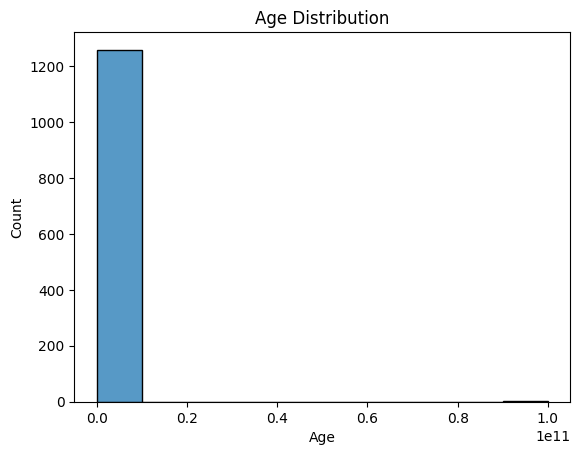

In [ ]:
sns.histplot(df['Age'], bins=10)
plt.title('Age Distribution')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


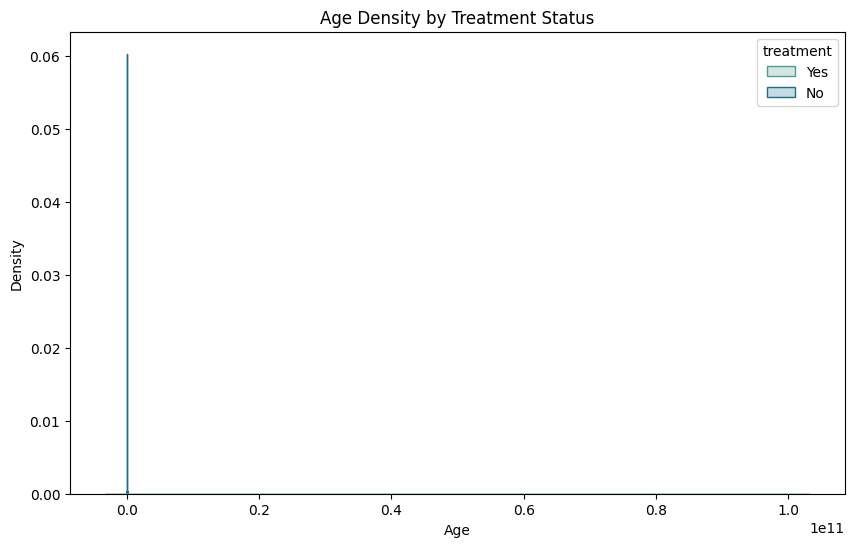

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='treatment', fill=True, common_norm=False, palette='crest')
plt.title('Age Density by Treatment Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 84.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 52.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 34.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 86.4% of the points cannot be plac

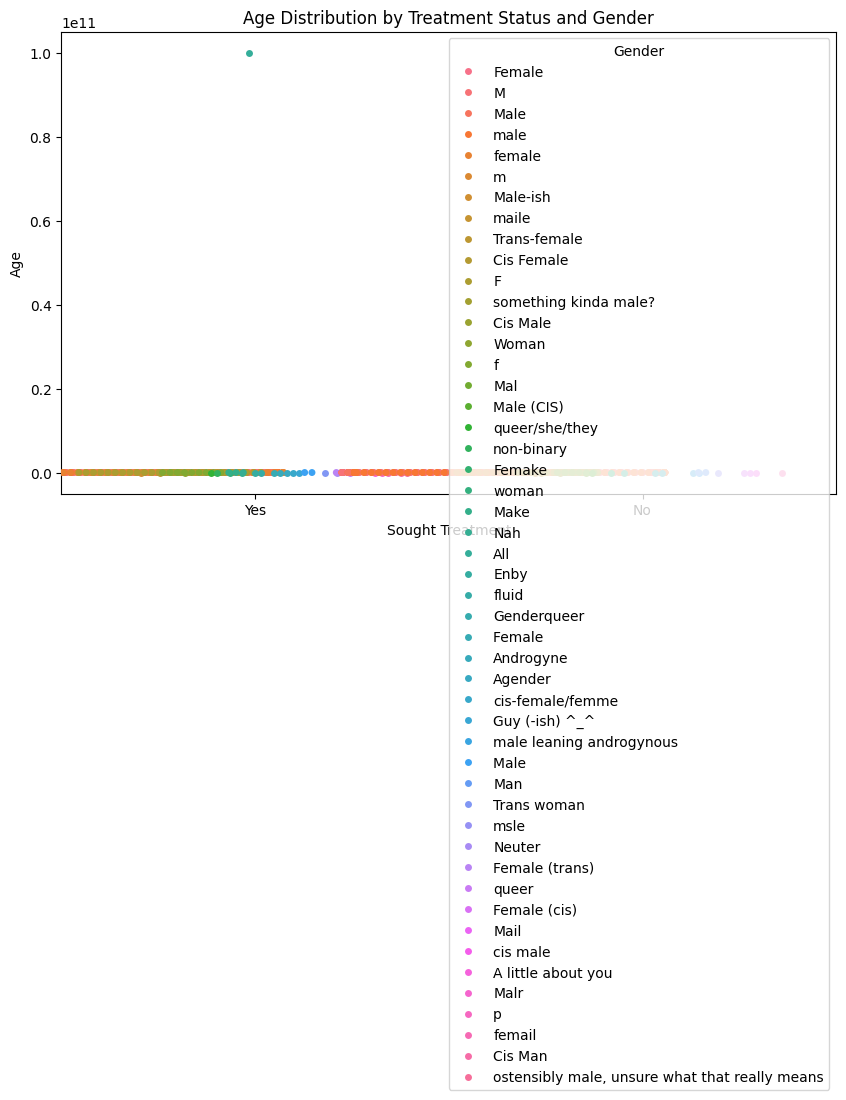

In [ ]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='treatment', y='Age', data=df, hue='Gender', dodge=True)
plt.title('Age Distribution by Treatment Status and Gender')
plt.xlabel('Sought Treatment')
plt.ylabel('Age')
plt.legend(title='Gender')
plt.show()


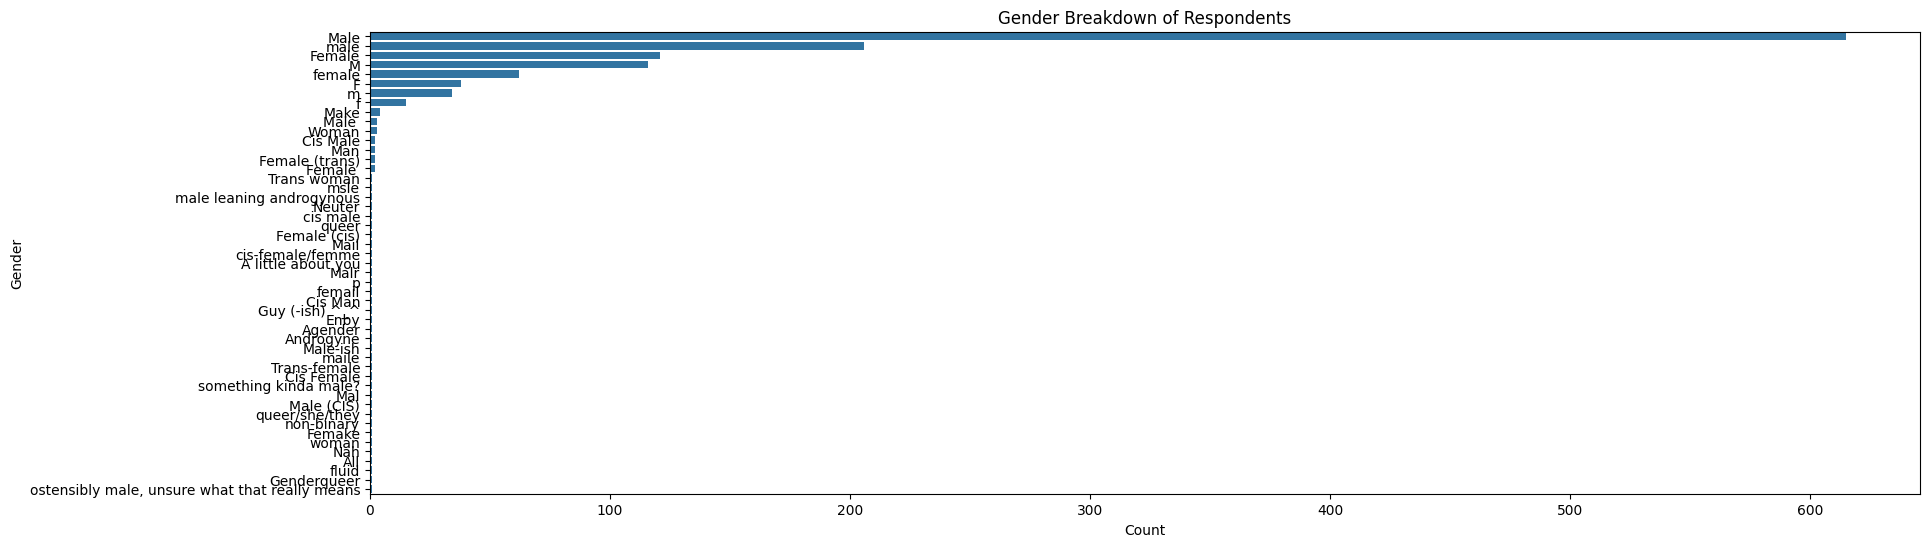

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(y='Gender', data=df, order=df['Gender'].value_counts().index)
plt.title('Gender Breakdown of Respondents')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


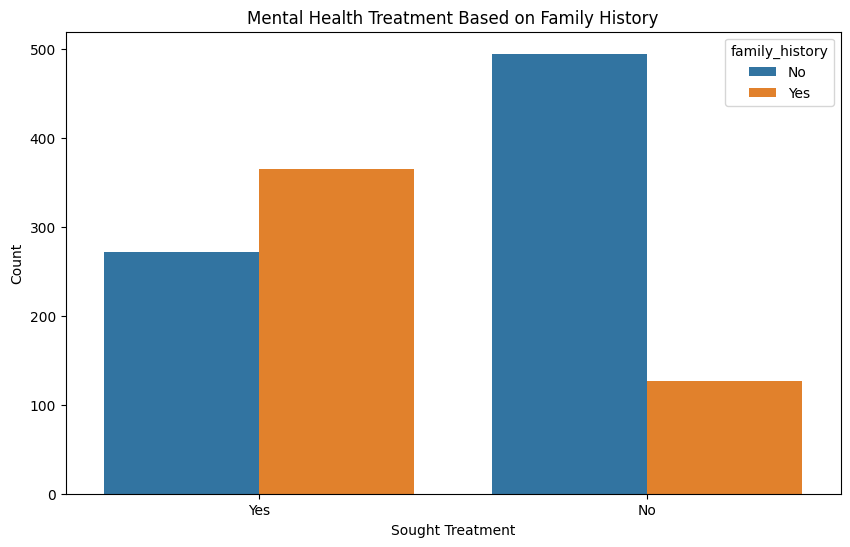

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='treatment', hue='family_history', data=df)
plt.title('Mental Health Treatment Based on Family History')
plt.xlabel('Sought Treatment')
plt.ylabel('Count')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


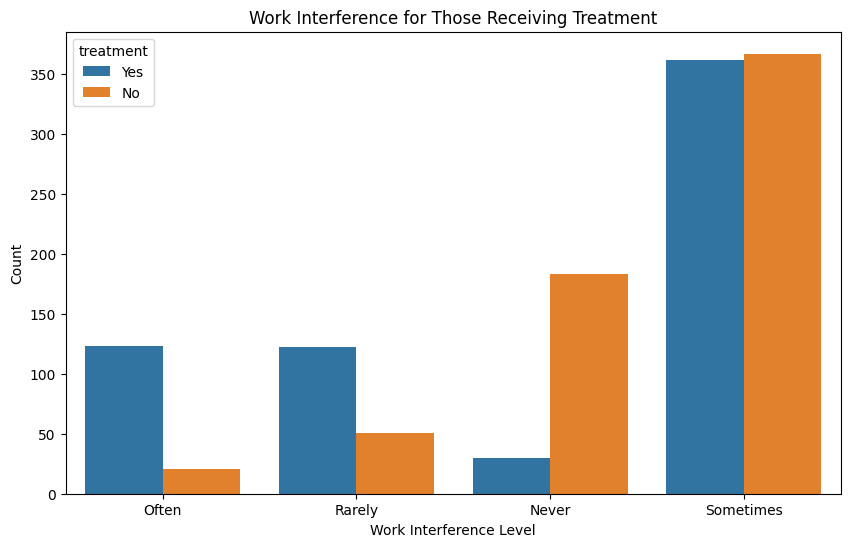

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='work_interfere', hue='treatment', data=df)
plt.title('Work Interference for Those Receiving Treatment')
plt.xlabel('Work Interference Level')
plt.ylabel('Count')
plt.show()


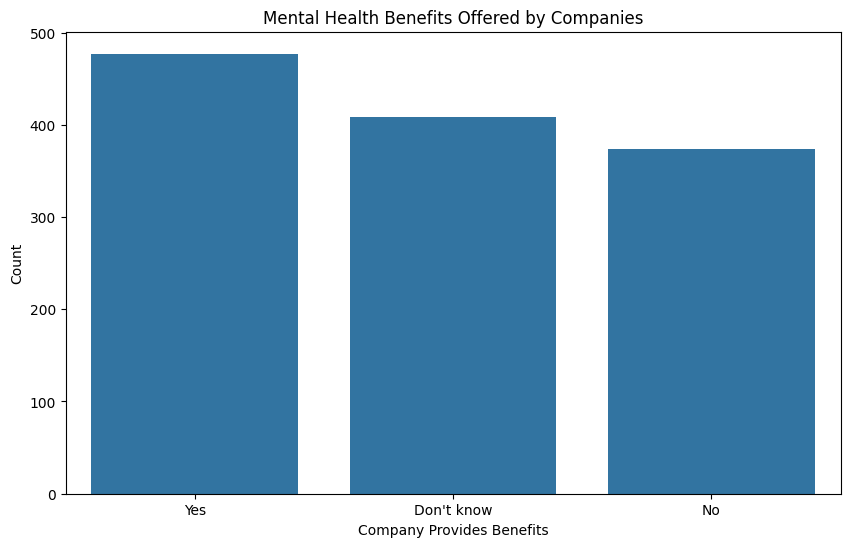

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='benefits', data=df)
plt.title('Mental Health Benefits Offered by Companies')
plt.xlabel('Company Provides Benefits')
plt.ylabel('Count')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


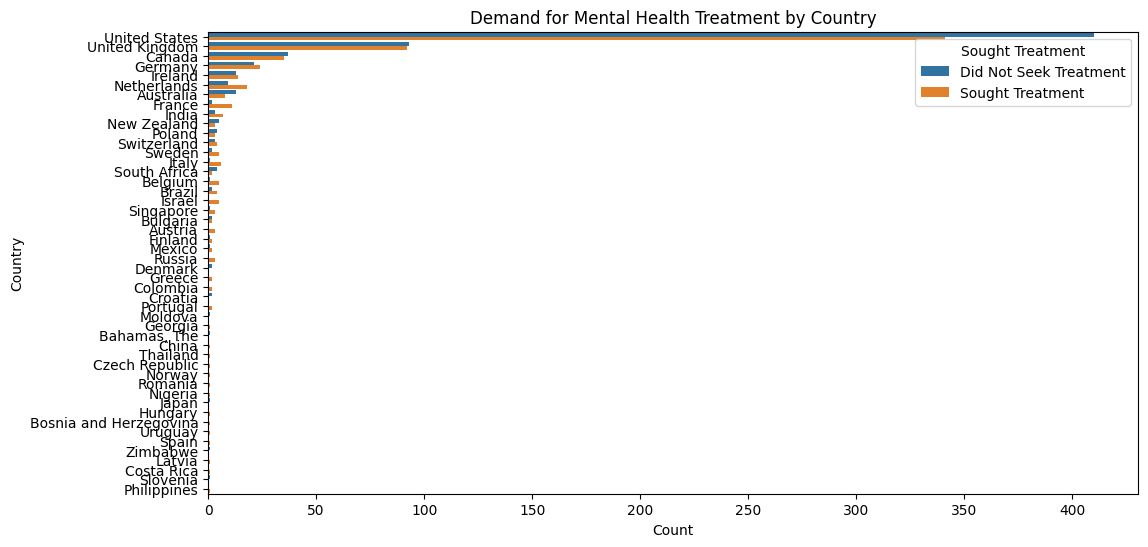

In [ ]:
# Count the number of respondents seeking treatment by country
plt.figure(figsize=(12, 6))
sns.countplot(y='Country', hue='treatment', data=df, order=df['Country'].value_counts().index)
plt.title('Demand for Mental Health Treatment by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.legend(title='Sought Treatment', loc='upper right', labels=['Did Not Seek Treatment', 'Sought Treatment'])
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


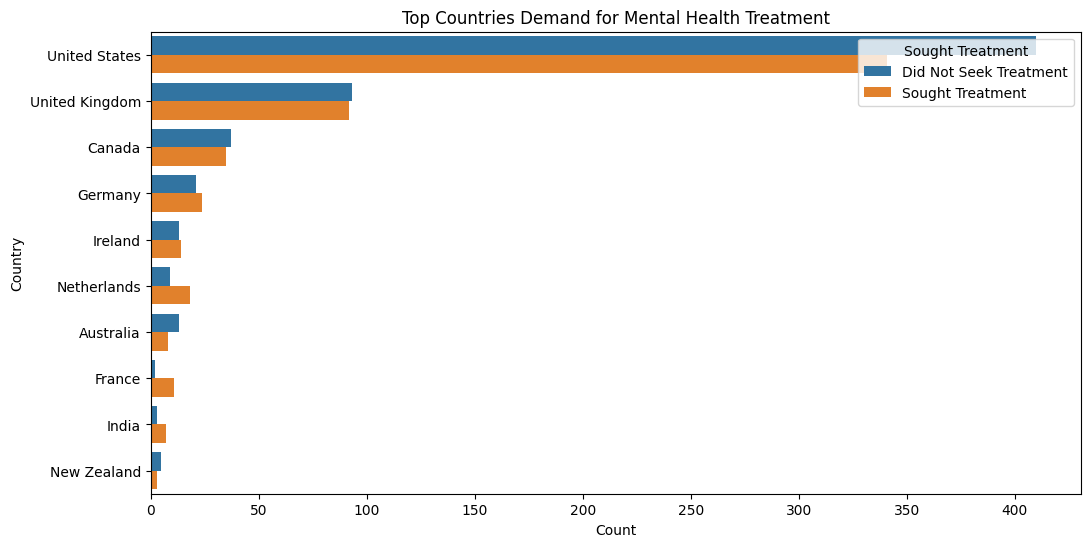

In [ ]:
# Get the top N countries by the number of respondents seeking treatment
top_n = 10  # Change this to your desired number
top_countries = df['Country'].value_counts().head(top_n).index

plt.figure(figsize=(12, 6))
sns.countplot(y='Country', hue='treatment', data=df[df['Country'].isin(top_countries)], order=top_countries)
plt.title('Top Countries Demand for Mental Health Treatment')
plt.xlabel('Count')
plt.ylabel('Country')
plt.legend(title='Sought Treatment', loc='upper right', labels=['Did Not Seek Treatment', 'Sought Treatment'])
plt.show()


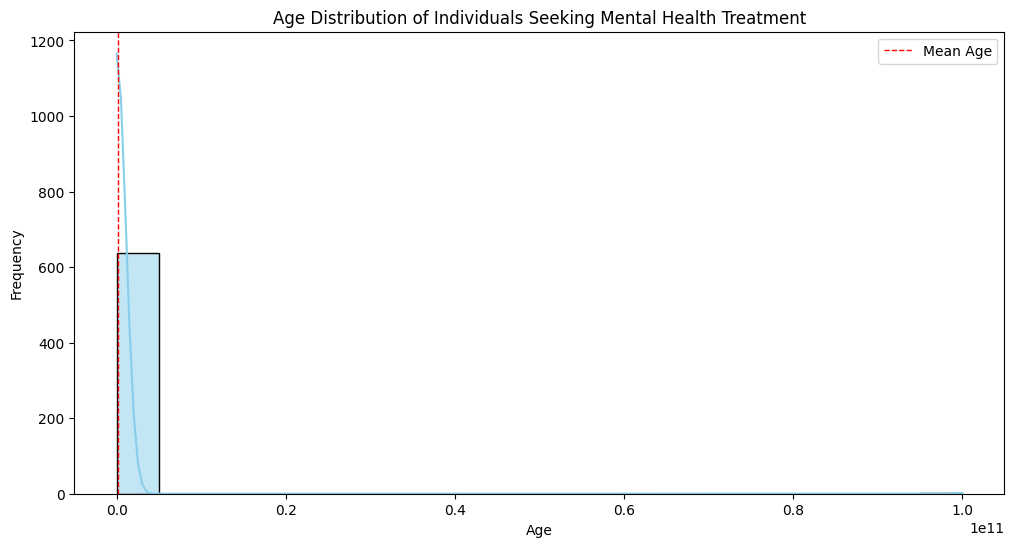

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['treatment'] == 'Yes']['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Individuals Seeking Mental Health Treatment')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(df[df['treatment'] == 'Yes']['Age'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Age')
plt.legend()
plt.show()



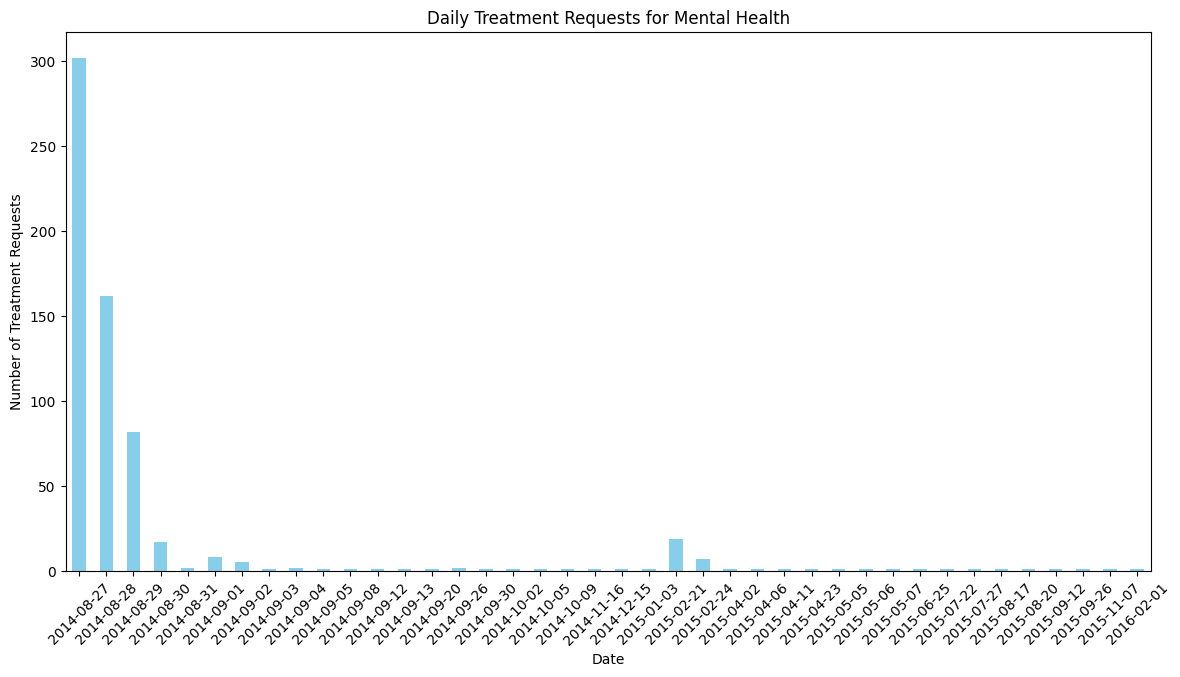

In [ ]:
# Ensure the timestamp column is in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract the date from the timestamp
df['Date'] = df['Timestamp'].dt.date

# Count the number of treatment requests by date
treatment_counts_by_date = df[df['treatment'] == 'Yes'].groupby('Date').size()

# Create a bar chart for treatment requests over time
plt.figure(figsize=(14, 7))
treatment_counts_by_date.plot(kind='bar', color='skyblue')
plt.title('Daily Treatment Requests for Mental Health')
plt.xlabel('Date')
plt.ylabel('Number of Treatment Requests')
plt.xticks(rotation=45)
plt.show()


<ipython-input-39-efa8526309b1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='mental_vs_physical', data=df, palette='pastel')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a lengt

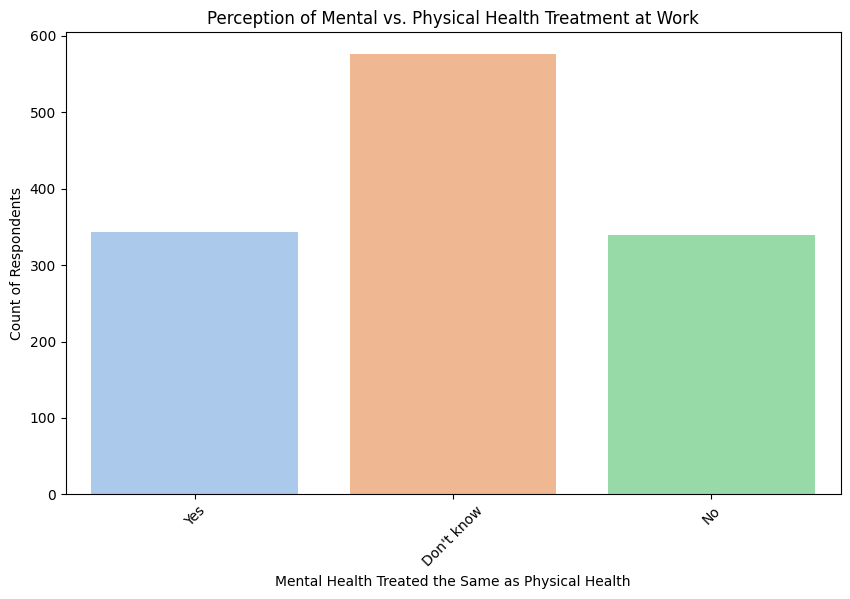

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='mental_vs_physical', data=df, palette='pastel')
plt.title('Perception of Mental vs. Physical Health Treatment at Work')
plt.xlabel('Mental Health Treated the Same as Physical Health')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=45)
plt.show()


In [ ]:
print(df.columns)



Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'Date'],
      dtype='object')
